# Домашняя работа №1. Часть №1. Первичный анализ данных фондового рынка.

 <b>рынок:</b> Бразилия<br>
 <b>период:</b> 2018 год

Выполнили студенты группы <b>22ПМИ-2</b>

Коршунова Анастасия, <br>
Деркач Алёна, <br>
Бовырин Денис

<b> 1. Собрать информацию по указанному фондовому рынку (сколько активов, когда начались торги, основные компании…). Собрать данные по дневным ценам активов (акций) на заданном фондовом рынке за указанный период (1 год, примерно 250 наблюдений). 

Мы нашли информацию о бразильских компаниях за 2018 год на сайте https://www.marketwatch.com/ и выделили 14 основных:
1.  Banco Bradesco                      
2.  Bicicletas Monark
3.  Braskem
4.  Centrais Eletricas Brasileiras
5.  Companhia Siderurgica Nacional Ord
6.  Cyrela Brazil Realty
7.  Embraer S.A.
8.  GOL Linhas Aereas Inteligentes
9.  Itau Unibanco Holding S.A. Ord
10. Light S/A Ord
11. Petroleo Brasileiro S/A Pref
12. Banco do Brasil S A Ord
13. S A Brasil Bolsa Balcao
14. Gerdau S A Ord

Все данные были записаны в excel файле Data.xlsx. В файле указаны дата, отрытие/закрытие торгов, самое высокое/низкое значение и объем.

<b>2. Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E).

В этой же таблице мы добавили столбец с преобразованием данных по ценам в данные по доходностям (Return и log_retern). Столбец 'Return' был добавлен для наглядности и проверки данных. В дальнейшем для подсчетов будет использоваться только log_return.

In [ ]:
#  Функция для вычисления стандартного отклонения
def find_risk(data):
    risk = data['log_return'].std()
    return risk

#  Функция для вычисления ожидаемой доходности
def find_expected_return(data):
    expected_return = data['log_return'].mean()
    return expected_return

In [ ]:
expected_returns = {}
risks = {}

#  Находим ожидаемую доходность и стандартное отклонение для каждого актива и записываем в словари
for sheet, data in data_sheets.items():
    expected_returns[sheet] = find_expected_return(data)
    risks[sheet] = find_risk(data)

Два актива (Banco Bradesco и Braskem) имеют очень близкие значения (выделено зелёным), поэтому на графике видно только 9 активов.

![Карта активов.png](<attachment:Карта активов.png>)
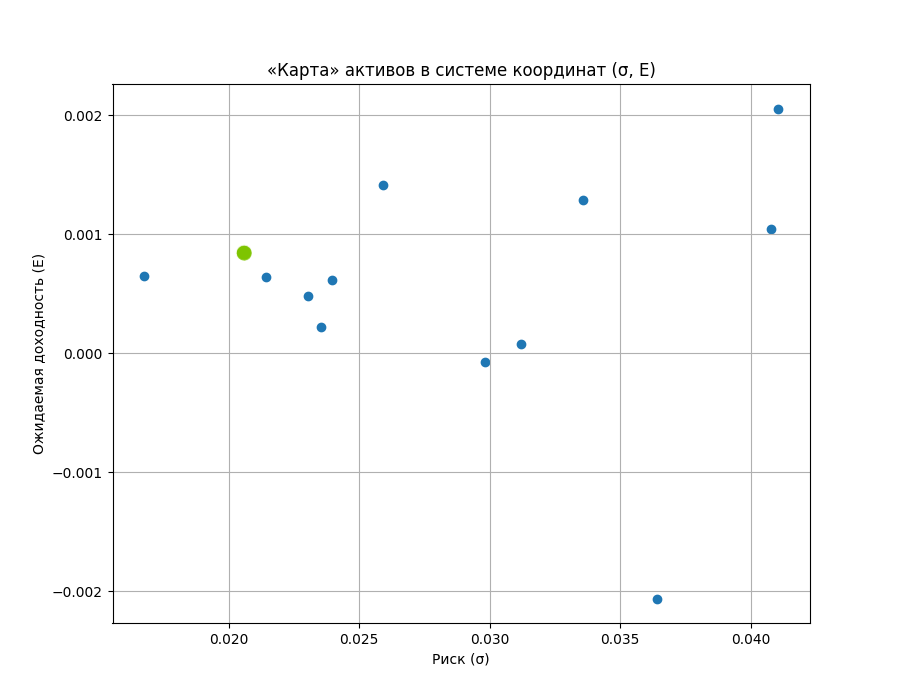

<b>3. Найдите все Парето оптимальные активы (те активы, характеристики которых нельзя улучшить сразу по двум критериям). Отметьте их на карте активов.



In [ ]:
#  Поиск Парето оптимальных активов

optimal_assets = []

for i, point_1 in risk_and_return.iterrows():
    flag = False
    for j, point_2 in risk_and_return.iterrows():
        if (point_2['E'] >= point_1['E'] and point_2['σ'] < point_1['σ']) or (
            point_2['E'] > point_1['E'] and point_2['σ'] <= point_1['σ']):
            flag = True
            break
    if not flag:
        optimal_assets.append(point_1)

optimal_assets = pd.DataFrame(optimal_assets)

Все Парето оптимальные активы выделены красным.

![Парето оптимальные активы-2.png](<attachment:Парето оптимальные активы-2.png>)
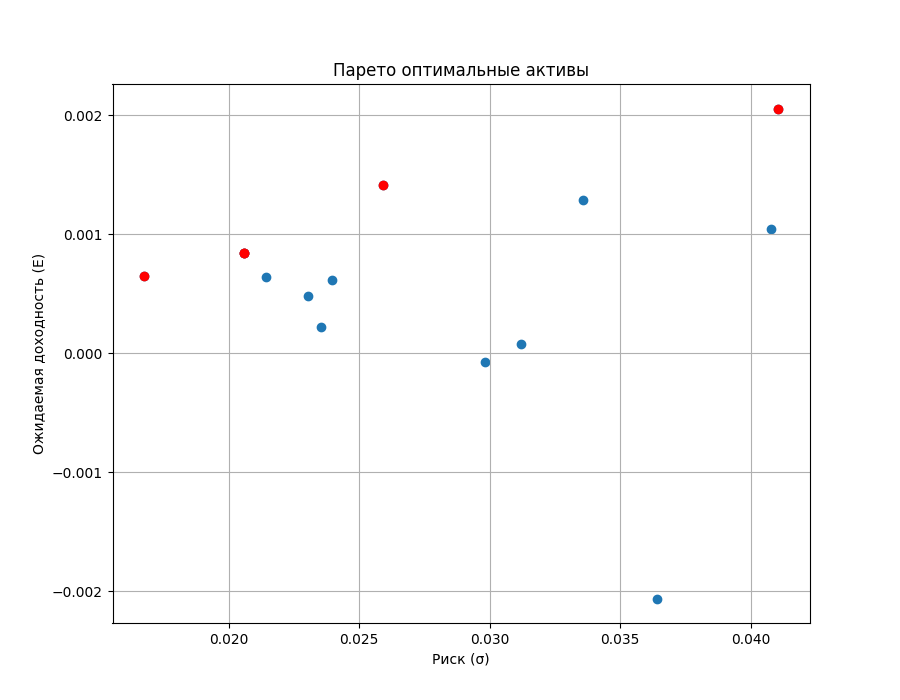

<b>4. Задайте уровень доверия  0,95 и оцените VaR (Value at Risk = Сумма под Риском,  Потери = - Доходности) для Парето-оптимальных активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? 

Рассчёт показателя VaR производился при помощи функции scipy.norm.ppf() (Probability Point Function), были рассмотренны Парето-оптимальные активы следующих компаний: "Banco Bradesco", "GOL Linhas Aereas Inteligentes", "Centrais Eletricas Brasileiras"

In [ ]:
clvl = 0.95

for i in range(len(companies)):
    VaR = norm.ppf(clvl, ESigmaList[i][0], ESigmaList[i][1])
    print("для %s: VaR - %f" % (companies[i], VaR))

вывод:<br>
для Banco Bradesco: VaR - 0.011753<br>
для GOL Linhas Aereas Inteligentes: VaR - 0.107996<br>
для Centrais Eletricas Brasileiras: VaR - 0.011730

По рассмотриваемой характеристике наиболее предпочтительным активом является Centrais Eletricas Brasileiras. Этот актив является высоким по средней доходности, при этом значение риска относительно других активов у него сильно больше, имеет смысл рассмотреть также актив Banco Bradesco с гораздо меньшим уровнем риска.

<b>5. Задайте уровень доверия  0,95 и оцените CVaR (Conditional Value at Risk = Условная Сумма под Риском, Потери = - Доходности) для Парето-оптимальных активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? Сравните с результатом предыдущего пункта.

In [ ]:
for i in range(len(companies)):
    result = 0
    n = 0
    VaR = norm.ppf(clvl, ESigmaList[i][0], ESigmaList[i][1])
    for j in log_results[i]:
        if float(j) <= float(VaR):
            result -= j
            n += 1
    print("для %s: CVaR - %f" % (companies[i], result/n))

Вывод:<br>
для Banco Bradesco: CVaR - 0.008586<br>
для GOL Linhas Aereas Inteligentes: CVaR - 0.000745<br>
для Centrais Eletricas Brasileiras: CVaR - 0.020786

С тем же самым уровнем доверия по показателю CVaR можно сделать вывод о том, что компания GOL Linhas Aereas Inteligentes является наиболее удачным активом, однако сумма под риском у него относительно высока. Это означает, что вероятность понести убытки при вложении в данный актив относительно высока, однако размер этих убытков сильно меньше чем, например у Centrais Eletricas Brasileiras, условная сумма под риском которого примерно в 30 раз больше, чем у GOL Linhas Aereas Inteligentes.

<b>6. Выберите несколько интересных (значимых)  активов вашего рынка.   Можно ли считать наблюдаемые доходности конкретного актива повторной выборкой из некоторого распределения (белый шум)?  Поищите научные подходы к ответу на этот вопрос (проверка гипотезы о случайности, Ивченко Г.И. Медведев Ю.И. Введение в математическую статистику).

<b>7. Выберите несколько интересных (значимых)  активов рынка из разных производственных секторов.   В предположении, что наблюдаемые доходности являются повторной выборкой из некоторого распределения исследовать (выборочно) распределения доходностей выбранных активов. Можно ли считать, что распределения доходностей подчиняются нормальному закону  распределения? 

Выберем всё те же активы, используемые в прошлых пунктах и проверим их распределение доходностей на подчинение нормальному закону распределения. Для начала построим гистограмы доходностей каждого актива.

![alt text](<Banco Bradesco.PNG>)

![Centrais Eletricas Brasileiras.PNG](<attachment:Centrais Eletricas Brasileiras.PNG>)
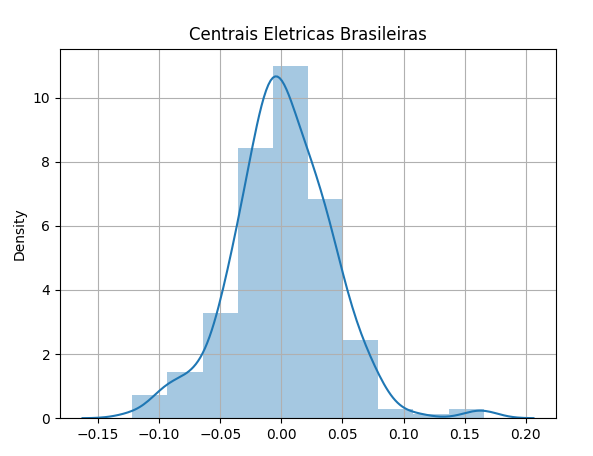

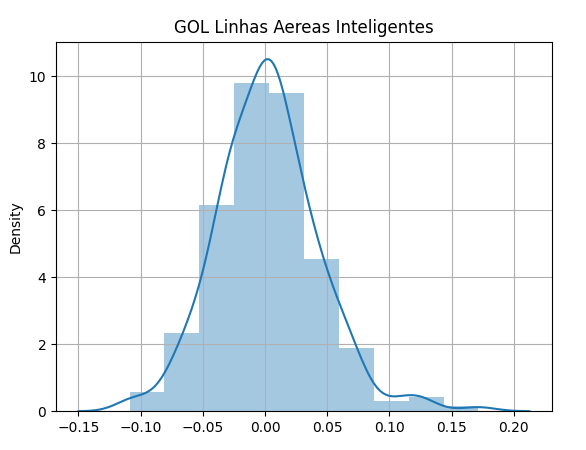

Из графической репрезентации распределения доходностей можно сделать предположение о том, что все распределения подчиняются нормальному, однако следует проверить это аналитическим путём, а именно использовать тест Шапиро-Уилка на нормальность распределения

In [ ]:
for i in range(len(companies)):
    stat, p = stats.shapiro(log_results[i])
    print("для %s: statistics: %f p-value - %f" % (companies[i], stat, p))

вывод:<br>
для Banco Bradesco: statistics: 0.992792 p-value - 0.283359<br>
для GOL Linhas Aereas Inteligentes: statistics: 0.979497 p-value - 0.001340<br>
для Centrais Eletricas Brasileiras: statistics: 0.980999 p-value - 0.002360

Если считать, что гипотеза о нормальности не отвергается с уровнем значимости 0.05, видно что распределение доходностей Banco Bradesco действительно можно считать нормальным, в то время как у остальных p-value сильно ниже удовлетворяющего гипотезе. Возможно это связано с наличием небольших "пиков" с возрастанием доходности в районе 0.12 и 0.16.

<b>8. Если в п.7 ответ отрицательный, какие другие законы распределения доходностей соответствуют данным наблюдений?

Компании Centrais Eletricas Brasileiras и GOL Linhas Aereas Inteligentes близки к нормальному распределению, но имеют небольшие отклонения по краям распределения. Такие отклонения, как у Centrais Eletricas Brasileiras иногда называют  fat tail или толстый хвост кривой. Вместо того, чтобы стремиться к оси абсцисс (к нулю), кривая может отрываться от неё, что не соответствует нормальному распределению. 

<b>9. Попробуйте найти что-нибудь интересное (необычное) на вашем рынке. Используйте любые известные вам методы анализа данных. 

Мы будем использовать горизонтальный анализ данных. Горизонтальный анализ бухгалтерского баланса имеет целью отразить изменения показателей в натуральном выражении — процентах или валюте. Обычно сравнивают текущий период с одним из предыдущих.

<b> Braskem

Например, компания Braskem с 2016 по середину 2018 года имела активный рост активов, но затем начался отрицательный рост. Из этих данных можно сделать вывод, что дальше цены акции будут и дальше падать в цене. 

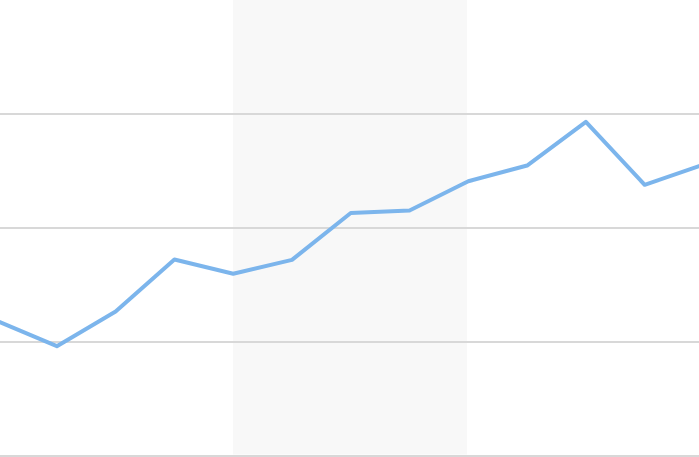

И как мы видим из последующего года, так и получилось. Начиная с середины 2018 года пошёл резкий обвал стоимости акций.

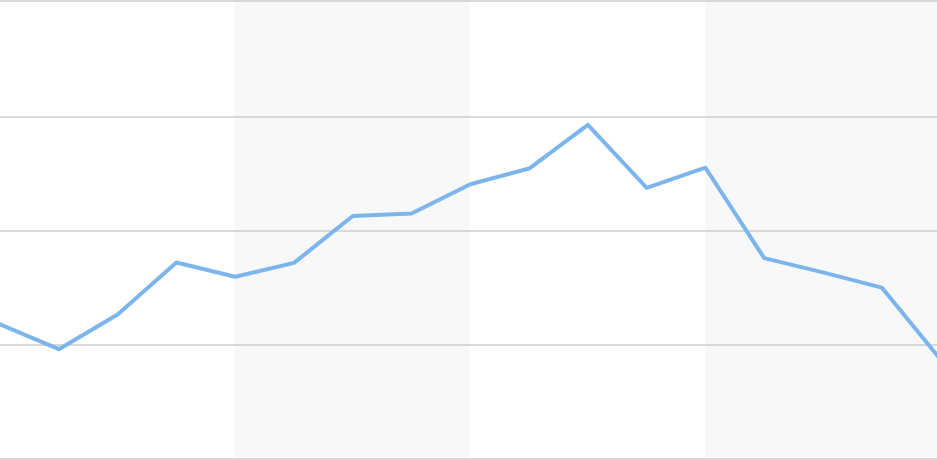

<b> Banco Bradesco 

Если сравнивать предыдущую компанию с очень близкой к ней, то мы заметим, что с 2016 по 2018 год был плавный подъем в цене, но затем к середине 2018 года цена резк упала почти к значению начала 2016. В 2019 году цена на акции достигла максимальных значений и рухнула к 2020 году.

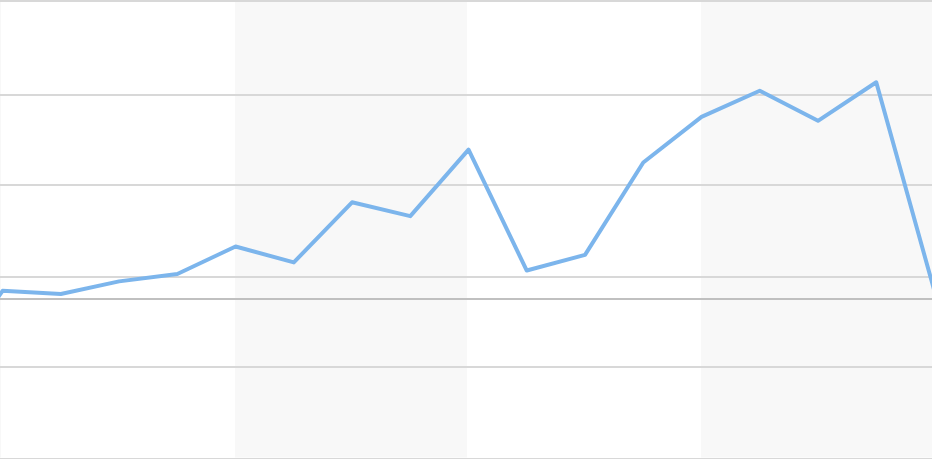

<b> GOL Linhas Aereas Inteligentes

Как мы можем заметить Banco Bradesco и GOL Linhas Aereas Inteligentes имеют очень схожие графики. 

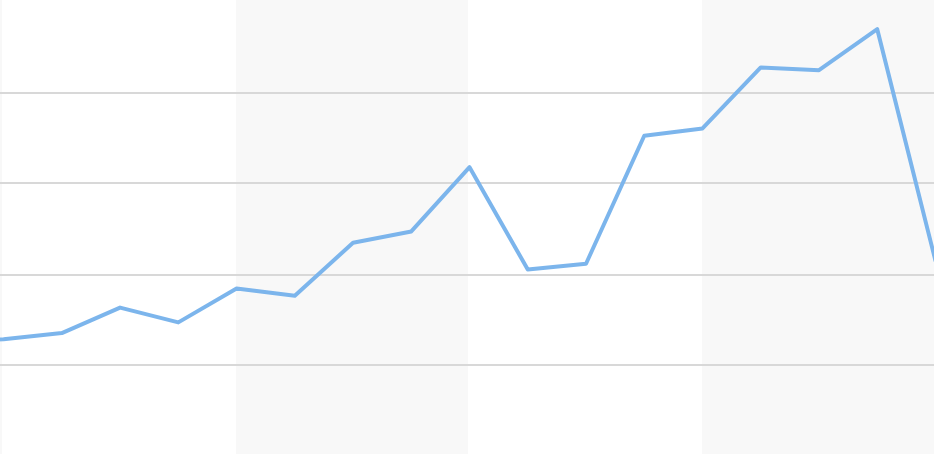

<b> Общий вывод

Посмотрев акции оставшихся компаний мы заметили общую черту у каждой из них. Акции всех компаний упали в начале 2020 года. В 2020 году экономика Бразилии сократилась на 4,1%, что стало наибольшим спадом за последние 30 лет. В основном он был вызван пандемией COVID-19.